In [1]:
import pandas as pd

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
my_data=churn_data.copy()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

([<matplotlib.patches.Wedge at 0x23d6fd8de10>,
 [Text(-0.962556155622219, 0.7165791284106557, '0'),
  Text(0.8823431426537006, -0.6568642010431012, '1')],
 [Text(-0.5614910907796277, 0.41800449157288244, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

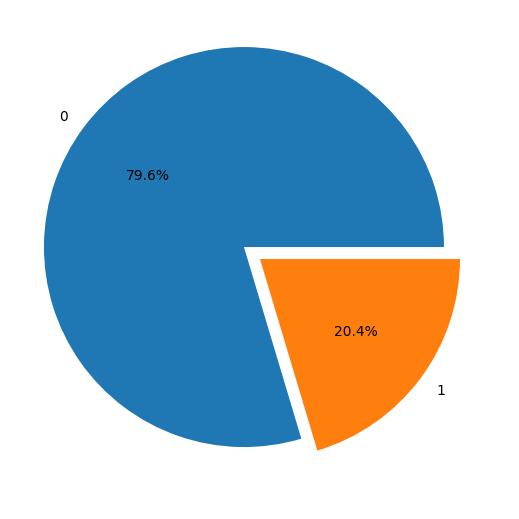

In [8]:
active_my_data = my_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    active_my_data,
    labels=active_my_data.index,
    autopct='%.1f%%',
    explode = [0.1, 0]

)  # Среди данных клиентов банка 79,6% являются активными клиентами; 20,4% - ушедшие клиенты


Вывод: Среди общего числа  клиентов банка 79,6% являются лояльными  клиентами; 20,4% - ушедшие клиенты.

In [9]:
Balance_my_data=my_data.sort_values(by='Balance',ascending=False).head(10)
clients=my_data[my_data['Balance']>2500]['CustomerId'].count()
mask=my_data[my_data['Balance']>2500]['CustomerId']
print(clients)



6383


9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [10]:
import seaborn as sns

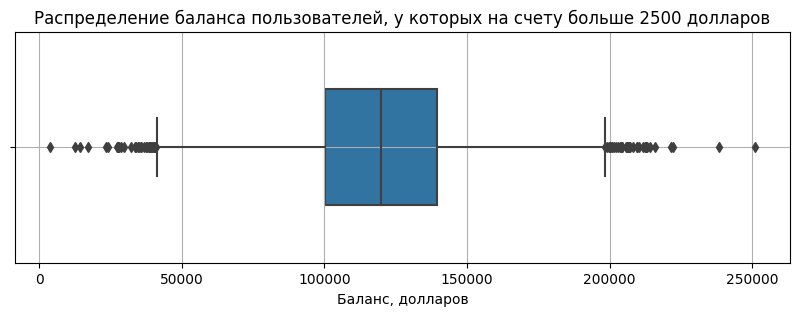

In [11]:
fig = plt.figure(figsize = (10, 3))
boxplot = sns.boxplot(
    data= my_data[my_data['Balance']>2500],
  
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов');
boxplot.set_xlabel('Баланс, долларов');

boxplot.grid()

Вывод: Среднее медианное значение баланса таких клиентов составляет 120000 долларов, 50% значений размера баланса находиться в диапазоне от 100000 до 140000 долларов. Общий диапазон от 40000 далларов  до 195000 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

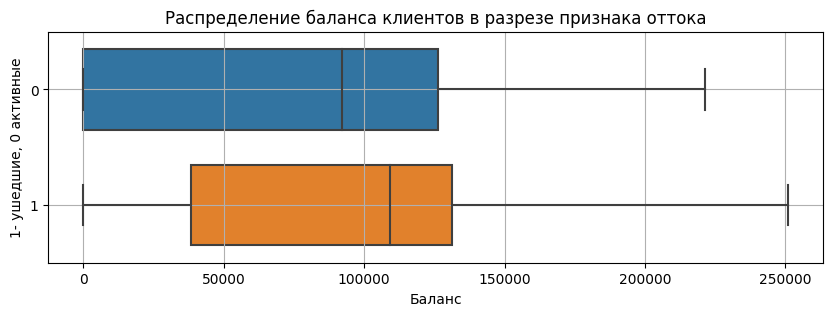

In [12]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=my_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиентов в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('1- ушедшие, 0 активные');
boxplot.grid()

Вывод: Среднее медианное значение баланса ушедших клиентов больше, чем у активных.  Максимальное значение баланса больше у Ушедших клиентов.  У активных клиентов большее количество счетов с балансом от нуля до 40000 долларов. Ушли более богатые.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

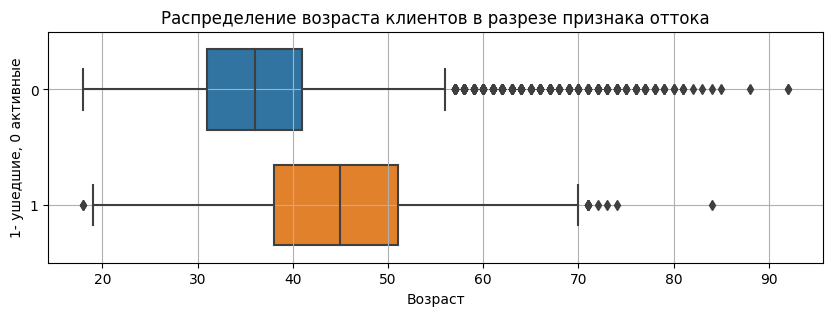

In [13]:
fig = plt.figure(figsize=(10, 3))
boxplot = sns.boxplot(
    data=my_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('1- ушедшие, 0 активные');
boxplot.grid()

Вывод: Половина ушедших клиентов в возрасте от 38 до 52 лет.  Среднее медианное значение возраста ушедших клиентов 45 лет. Среднее медианное значение возраста активных клиентов 37 лет. Остались молодые и бедные) Банку надо обратить внимание на категорию людей от 38 до 52 лет. 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

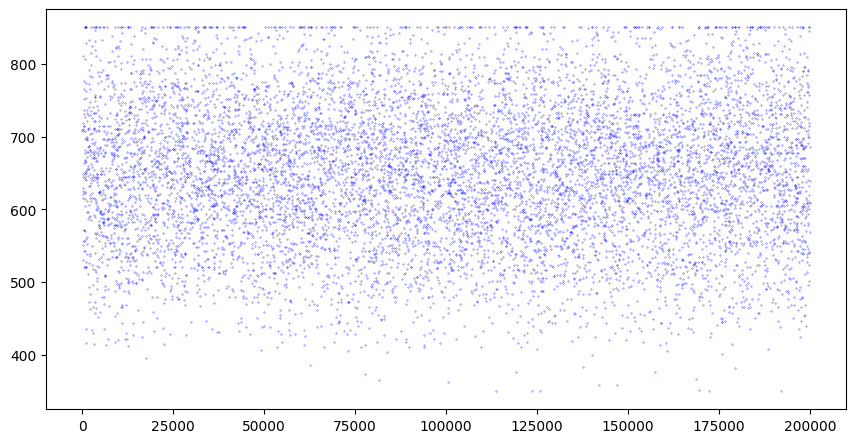

In [14]:


fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=my_data['EstimatedSalary'], 
    y=my_data['CreditScore'],
    s=0.05,
    marker='o',
    c = 'blue'
);

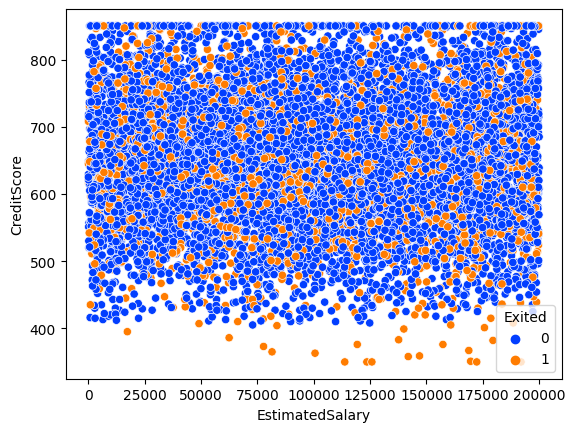

In [15]:
sns.scatterplot(
    x='EstimatedSalary',
    y='CreditScore', 
    data=my_data,
    palette='bright',
    hue ='Exited'
   ); 

In [16]:
my_data['Exited'] = my_data['Exited'].astype ('category')
my_data['Exited'] = my_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})
my_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Loyal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Loyal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Loyal


In [17]:
import plotly
import plotly.express as px

In [18]:
fig = px.scatter(
    data_frame=my_data,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    color='Exited',
    width=1200,
    height=600
)
fig.show()

Вывод: Взаимосвязи между уровнем заработной платы и кредитного рейтинга не наблюlается. Вне зависимости от уровня заработной платы большинство клиентов имеют кредитный рейтинг от 500 до 750 .

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

([<matplotlib.patches.Wedge at 0x23d7551c590>,
 [Text(-0.3841820835406343, 1.1368395342731432, 'Female'),
  Text(0.352167007480962, -1.0421028734447977, 'Male')],
 [Text(-0.22410621539870332, 0.6631563949926669, '60.4%'),
  Text(0.19209109498961563, -0.5684197491517078, '39.6%')])

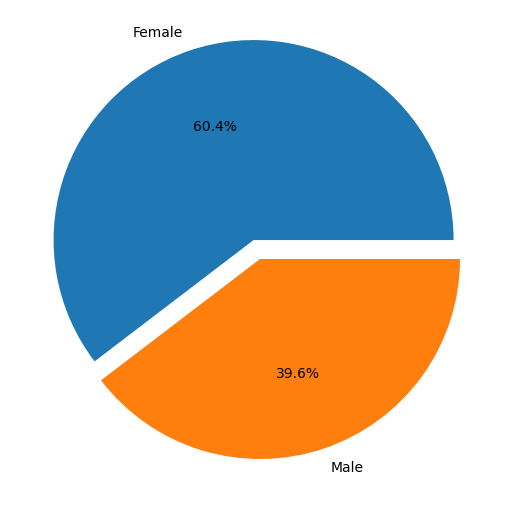

In [19]:
Male_female = churn_data.groupby('Gender')['Exited'].mean()*100
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Male_female,
    labels=Male_female.index,
    autopct='%.1f%%',
    explode = [0.1, 0]

) 

Вывод: Среди ушедших клиентов 39,6% мужчины и 60,4% женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [20]:
churn_data.groupby('NumOfProducts')['Exited'].describe()

,count,mean,std,min,25%,50%,75%,max
NumOfProducts,,,,,,,,
1,5084.0,0.277144,0.447632,0.0,0.0,0.0,1.0,1.0
2,4590.0,0.075817,0.264734,0.0,0.0,0.0,0.0,1.0
3,266.0,0.827068,0.378902,0.0,1.0,1.0,1.0,1.0
4,60.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [21]:
my_data[my_data['Exited']=='Exited']['NumOfProducts'].describe()

count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64

<AxesSubplot: xlabel='NumOfProducts', ylabel='count'>

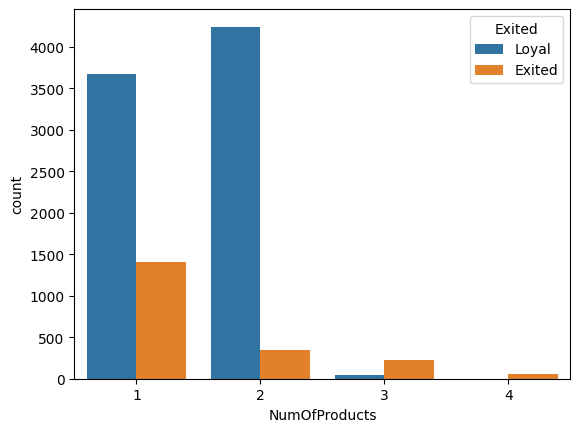

In [27]:
sns.countplot(data= my_data, x="NumOfProducts", hue="Exited") 

In [ ]:
bar_data = my_data.groupby(
    by='NumOfProducts',
   as_index=False
)[['CustomerId']].count()

#строим график
fig = px.bar(
    data_frame= bar_data, #датафрейм
    x="NumOfProducts", #ось x
    y="CustomerId", #ось y
    color='NumOfProducts', #расцветка в зависимости от страны
    #text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height= 500, #высота
    width= 700, #ширина
    title='Зависимость оттока клиентов от числа приобретенных услуг' #заголовок
)

#отображаем его
fig.show()


Вывод: Среди ушедших клиентов были клиенты со всеми видами банковских услуг. Но среди ушедших было больше клиентов 3 и 4 банковскими услугами. А среди лояльных клиентов нет людей с 4 банковскими услугами. Из общего распределения видно , что клиенты с 3-4 банковскими услугами , почти все ушли.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

([<matplotlib.patches.Wedge at 0x25710d94250>,
 [Text(-0.5081200716574588, 1.0871126863296277, '0'),
  Text(0.46577663905173594, -0.9965200060779859, '1')],
 [Text(-0.29640337513351755, 0.634149067025616, '63.9%'),
  Text(0.25405998493731047, -0.5435563669516286, '36.1%')])

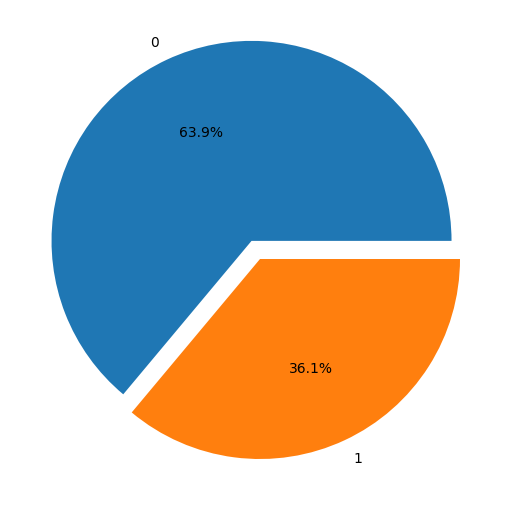

In [ ]:
IsActiveMember = churn_data.groupby('IsActiveMember')['Exited'].sum()*100
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    IsActiveMember,
    labels=IsActiveMember.index,
    autopct='%.1f%%',
    explode = [0.1, 0]

) 


Вывод: Среди ушедших клиентов больше половины 63,9% являются Неактивными клиентами. Можно предлагать более выгодные услуги, провести опрос среди этих клиентов о достоинствах и недостатках данного банка, провести среди них розыгрыш.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [28]:
churn_countries=churn_data.groupby('Geography')['Exited'].mean()
churn_countries

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [81]:
my_data = my_data.groupby(['Geography'])[['Exited']].count()
my_data

,Exited
Geography,
France,5014
Germany,2509
Spain,2477


In [58]:
pivot = churn_data.pivot_table(
   
    values= 'Exited',
index = 'Geography'

)
pivot.columns = pivot.columns.astype('string')
display(pivot)

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [83]:
fig = px.choropleth(
    data_frame=my_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    animation_frame="Exited", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Распределение оттока клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='tropic' #палитра цветов
)

#отображаем график
fig.show()

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [61]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [63]:
my_data['CreditScoreCat']= my_data['CreditScore'].apply(get_credit_score_cat)
my_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Loyal,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Loyal,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Loyal,Excellent


In [73]:
new_data=my_data.pivot_table(
    values = 'Exited',
    columns = 'Tenure',
    index= 'CreditScoreCat',
    aggfunc= 'count'
)
#new_data.columns = new_data.columns.astype('string')
display(new_data)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,40,96,102,101,91,90,87,94,102,96,51
Fair,92,218,230,231,218,232,220,263,244,221,112
Good,157,388,395,369,369,387,350,370,361,375,182
Poor,106,266,255,245,253,236,239,238,247,231,118
Very_Poor,18,67,66,63,58,67,71,63,71,61,27


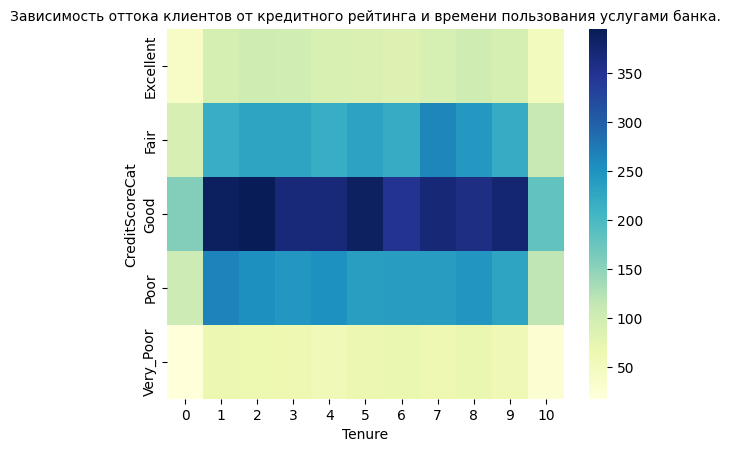

In [77]:
heatmap = sns.heatmap(data=new_data, cmap='YlGnBu')
heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга и времени пользования услугами банка.', fontsize=10);

Вывод: Чаще всего уходят клиенты с кредитным рейтингом 'Good', вне зависимости от времени пользования услугами банка. 